<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment%204/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generate 1000 real number for the variable X from the uniform distribution U [0,1]. Construct the training set
# T = { ($x_1$, $y_1$), ($x_2$, $y_2$), ... ,($x_{100}$, $y_{100}$)} using the relation

# $Y_i$ = sin(2 π $x_i$) + $ε_i$ where $ε_i$ ~ N(0,0.25).

#In the similar way construct a testing set of size 50 i,e.
#Test = { ($x'_1$, $y'_1$), ($x'_2$, $y'_2$), ..., ($x'_{50}$, $y'_{50}$)}.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import random

# Training Data
train_x = np.random.uniform(0, 1, 1000)
train_e = np.random.normal(0, 0.25, 1000)
train_y = np.sin(2 * math.pi * train_x) + train_e

# Testing Data
test_x = np.random.uniform(0, 1, 50)
test_e = np.random.normal(0, 0.25, 50)
test_y = np.sin(2 * math.pi * test_x) + test_e

In [70]:
data_m9 = pd.DataFrame([train_x**9, train_x**8, train_x**7, train_x**6, train_x**5, train_x**4, train_x**3, train_x**2, train_x, np.ones(len(train_x))])
data_m9 = data_m9.T
data_m9.columns = ['x^9', 'x^8', 'x^7', 'x^6', 'x^5' , 'x^4', 'x^3', 'x^2', 'x', 'ones']
data_m9

,x^9,x^8,x^7,x^6,x^5,x^4,x^3,x^2,x,ones
0,8.410698e-07,3.979703e-06,1.883083e-05,8.910212e-05,4.216059e-04,1.994919e-03,0.009439,0.044665,0.211340,1.0
1,2.588899e-06,1.081136e-05,4.514869e-05,1.885429e-04,7.873632e-04,3.288063e-03,0.013731,0.057342,0.239461,1.0
2,1.094995e-17,8.393090e-16,6.433268e-14,4.931073e-12,3.779646e-10,2.897083e-08,0.000002,0.000170,0.013046,1.0
3,4.898058e-08,3.178655e-07,2.062828e-06,1.338698e-05,8.687647e-05,5.637957e-04,0.003659,0.023744,0.154092,1.0
4,6.298074e-02,8.563063e-02,1.164261e-01,1.582967e-01,2.152252e-01,2.926271e-01,0.397865,0.540950,0.735493,1.0
...,...,...,...,...,...,...,...,...,...,...
995,3.174966e-05,1.003566e-04,3.172142e-04,1.002673e-03,3.169320e-03,1.001781e-02,0.031665,0.100089,0.316368,1.0
996,4.074014e-04,9.698101e-04,2.308612e-03,5.495599e-03,1.308215e-02,3.114177e-02,0.074132,0.176470,0.420084,1.0
997,3.009143e-01,3.438695e-01,3.929565e-01,4.490506e-01,5.131520e-01,5.864039e-01,0.670112,0.765770,0.875083,1.0
998,2.584779e-06,1.079606e-05,4.509279e-05,1.883428e-04,7.866668e-04,3.285736e-03,0.013724,0.057321,0.239419,1.0


## (a) Estimate the L1- norm kernel regression model using the sub gradient descent method and RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value of RBF kernel parameter σ and regularization parameter λ. Also obtain the corresponding plot of best estimate.

In [71]:
#gradient-descent
alpha = 0.000982345
lmda = 0.0002

theta = np.array([0 for i in range(10)])

for k in range(700):
  temp1 = np.dot(data_m9, theta)
  temp2 = train_y - temp1
  temp3 = []

  for j, i in enumerate(temp2):
    if i > 0:
      temp3.append(data_m9.iloc[j] * (-1))
    elif i < 0:
      temp3.append(data_m9.iloc[j])
    else:
      temp3.append(random.uniform(-1,1) * data_m9.iloc[j])
  
  temp3 = pd.DataFrame(temp3)
  temp4 = lmda * theta + temp3.sum()
  theta = theta - alpha * temp4

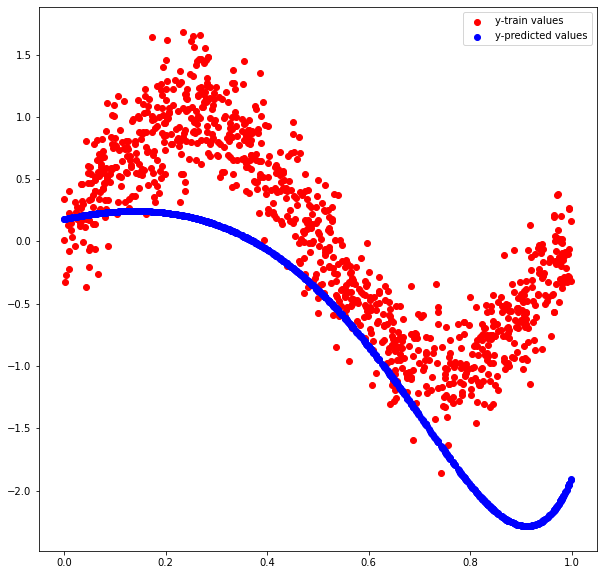

In [81]:
plt.figure(figsize = (10,10))
y_hat = np.dot(data_m9, theta)

plt.scatter(train_x, train_y, color='red')
plt.scatter(train_x, y_hat, color='blue')
plt.legend(['y-train values', 'y-predicted values'])

In [73]:
rmse = math.sqrt(((train_y - y_hat)**2).mean())
rmse

0.9524900003988467

RMSE is -> 1.0172988917400043


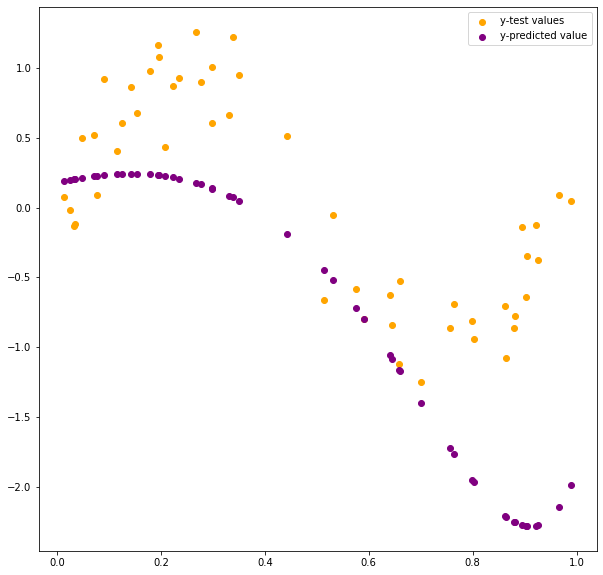

In [80]:
data_9_test = pd.DataFrame([test_x**9, test_x**8, test_x**7, test_x**6, test_x**5, test_x**4, test_x**3, test_x**2, test_x, np.ones(len(test_x))])
data_9_test = data_9_test.T
data_9_test.columns = ['x^9', 'x^8', 'x^7', 'x^6', 'x^5' , 'x^4', 'x^3', 'x^2', 'x', 'ones']
y_hat_test = np.dot(data_9_test, theta)

plt.figure(figsize = (10,10))
plt.scatter(test_x, test_y, color='orange')
plt.scatter(test_x, y_hat_test, color='purple')
plt.legend(['y-test values', 'y-predicted value'])

rmse = math.sqrt(((test_y - np.dot(data_9_test, theta)) ** 2).mean())
print(f'RMSE is -> {rmse}')

## (b) Also, estimate the ε- Support Vector Regression model using the sub gradient descent method and RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value of RBF kernel parameter σ, regularization parameter λ and ε . Find the sparsity of the obtained solution vector α.

In [76]:
X = np.random.uniform(0.0,1.0,1000)

def my_kernel(X,Y,sigma):
  K = np.zeros((X.shape[0],Y.shape[0]))
  for i,x in enumerate(X):
    for j,y in enumerate(Y):
      K[i,j] = np.exp((-(np.linalg.norm(x-y)**2))/(sigma))
  return K

x = my_kernel(X,X, 2**-8)
x

array([[1.00000000e+00, 6.91088068e-14, 4.98537871e-80, ...,
        2.37155932e-02, 3.42756445e-01, 8.96155149e-32],
       [6.91088068e-14, 1.00000000e+00, 1.40779691e-28, ...,
        2.90682119e-06, 2.67221046e-19, 1.65838542e-04],
       [4.98537871e-80, 1.40779691e-28, 1.00000000e+00, ...,
        5.97514081e-59, 1.22305053e-92, 7.76503477e-12],
       ...,
       [2.37155932e-02, 2.90682119e-06, 5.97514081e-59, ...,
        1.00000000e+00, 1.48414755e-04, 3.41378364e-19],
       [3.42756445e-01, 2.67221046e-19, 1.22305053e-92, ...,
        1.48414755e-04, 1.00000000e+00, 7.72687004e-40],
       [8.96155149e-32, 1.65838542e-04, 7.76503477e-12, ...,
        3.41378364e-19, 7.72687004e-40, 1.00000000e+00]])

In [77]:
h_mat = np.zeros([1000,1000])
sigma = 2**-7
def kernel(x1, x2, sigma):
  return np.exp(((-1) / (2 * sigma)) * np.linalg.norm(x1-x2)**2)

for i in range(len(data_m9)):
  if i % 100 == 0:
    print(i)
  for j in range(len(data_m9)):
    h_mat[i,j] = kernel(data_m9.iloc[i], data_m9.iloc[j], sigma)

0
100
200
300
400
500
600
700
800
900


In [82]:
lmda = 2**(-1)
alpha = 0.00001
theta = np.array([0 for _ in range(len(data_m9) + 1)])
b = 0
sigma = 2**-8
h_mat = np.column_stack((h_mat, np.ones(1000)))
for k in range(500):
  sub_grad = (2**(-1)*theta - np.dot(h_mat.T,np.sign(train_y - np.dot(h_mat,theta))))
  theta = theta - sub_grad*alpha

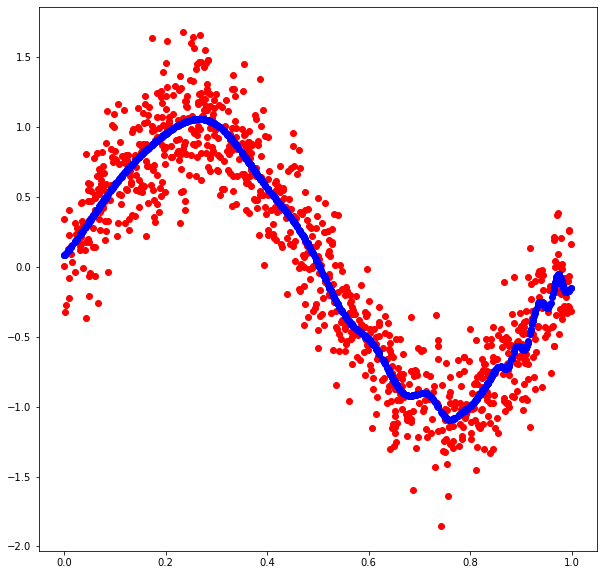

In [83]:
y_hat = []

for i in range(len(data_m9)):
  y_hat.append(np.dot(h_mat[i].T, theta) + b)

plt.figure(figsize=(10,10))
plt.scatter(train_x, train_y, color='red')
plt.scatter(train_x, y_hat, color='blue')

# 2. Consider the motorcycle dataset. Estimate the L1- norm kernel regression model using RBF kernel (Gaussian Kernel) . Find the best RMSE and MAE using leave- one out by tuning the value of kernel parameter σ and regularization parameter λ. Also obtain the corresponding plot of best estimate.

In [78]:
motorcycle_data = pd.read_excel("/content/motorcycle.xlsx")

In [85]:
scaled_x = (motorcycle_data['x'] - motorcycle_data['x'].mean()) / (motorcycle_data['x'].max() - motorcycle_data['x'].min())
# scaled_x = motorcycle_data['x']

data_m9 = pd.DataFrame([scaled_x**9 ,scaled_x**8, scaled_x**7 ,scaled_x**6, scaled_x**5, scaled_x**4, scaled_x**3, scaled_x**2, scaled_x, np.ones(len(scaled_x))])
data_m9 = data_m9.T
6
data_m9.columns = ['x^9', 'x^8', 'x^7', 'x^6', 'x^5' , 'x^4', 'x^3', 'x^2', 'x', 'ones']
data_m9

,x^9,x^8,x^7,x^6,x^5,x^4,x^3,x^2,x,ones
0,-0.000347,0.000841,-0.002038,0.004938,-0.011967,0.028999,-0.070272,0.170290,-0.412662,1.0
1,-0.000321,0.000784,-0.001916,0.004684,-0.011450,0.027994,-0.068437,0.167313,-0.409039,1.0
2,-0.000252,0.000632,-0.001587,0.003985,-0.010008,0.025135,-0.063125,0.158539,-0.398169,1.0
3,-0.000213,0.000545,-0.001395,0.003569,-0.009130,0.023354,-0.059741,0.152821,-0.390923,1.0
4,-0.000180,0.000470,-0.001224,0.003190,-0.008314,0.021670,-0.056480,0.147208,-0.383677,1.0
...,...,...,...,...,...,...,...,...,...,...
128,0.002238,0.004409,0.008686,0.017111,0.033708,0.066402,0.130809,0.257686,0.507628,1.0
129,0.003920,0.007256,0.013430,0.024860,0.046017,0.085180,0.157671,0.291855,0.540236,1.0
130,0.003920,0.007256,0.013430,0.024860,0.046017,0.085180,0.157671,0.291855,0.540236,1.0
131,0.004419,0.008072,0.014743,0.026929,0.049187,0.089843,0.164101,0.299737,0.547483,1.0


In [ ]:
lmda = 0.00015
alpha = 0.8
theta = np.array([0 for _ in range(len(data_m9))])
b = 0
sigma = 2**-8

def kernel(x1, x2, sigma):
  d = (x1 - x2)**2
  d = ((-1) / (2 * sigma**2)) * d
  ans = math.e ** (d.sum())
  return ans


def create_kernel_vector(i):
  temp = []
  for j in range(len(data_m9)):
    temp.append(kernel(data_m9.iloc[i], data_m9.iloc[j], sigma))
  return np.array(temp)


for k in range(50):
  main_vector = []
  b_vector = []
  
  for i in range(len(data_m9)):
    b_temp = 1
    temp1 = create_kernel_vector(i)
    temp2 = np.dot(temp1, theta.T) + b

    if motorcycle_data['y'].iloc[i] - temp2 > 0:
      temp1 = temp1 * (-1)
      b_temp *= (-1)

    elif motorcycle_data['y'].iloc[i] - temp2 == 0:
      temp1 = np.random.uniform(-1,1) * temp1
      b_temp *= np.random.uniform(-1,1)
  
    main_vector.append(temp1)
    b_vector.append(b_temp)
  
  main_vector = pd.DataFrame(main_vector)
  temp = lmda * theta + (1/2) * main_vector.sum()
  theta = theta - alpha * temp
  b = b - alpha * (1/2) * sum(b_vector)

In [ ]:
y_hat = []
for i in range(len(data_m9)):
temp1 = create_kernel_vector(i)
y_hat.append(np.dot(temp1.T, theta) + b)